<a href="https://colab.research.google.com/github/rmonro12/Intro_to_ML/blob/main/Homework_Assignments/HW_2/Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ryan Monroe (801219572) - 09/29/2025 <br>
ECGR 4105 - Homework 2, Problem 3

In [4]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Import .csv dataset from class repository
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
df = pd.read_csv(url)

#Confirm successful import by printing
#print(df.head())

In [6]:
#Map non-numerical data to numbers
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Define the values to be mapped
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
#Replace strings with numerical equivalents
df[varlist] = df[varlist].apply(binary_map)

In [7]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.80, test_size = 0.20, random_state = 100)

m = df_train.shape[0] #Retrieve the number of training examples

In [8]:
#Scale all numerical features (exclude yes-no features)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

# Create new DataFrames for normalized and standardized data
df_train_norm = df_train.copy()
df_test_norm = df_test.copy()
df_train_std = df_train.copy()
df_test_std = df_test.copy()

#Feature scaling - Normalization
from sklearn.preprocessing import MinMaxScaler
scaler_norm = MinMaxScaler()
df_train_norm[num_vars] = scaler_norm.fit_transform(df_train[num_vars])
df_test_norm[num_vars] = scaler_norm.transform(df_test[num_vars])

#Feature scaling - Standardization
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
df_train_std[num_vars] = scaler_std.fit_transform(df_train[num_vars])
df_test_std[num_vars] = scaler_std.transform(df_test[num_vars])

In [9]:
#Extrapolate data from .csv file
#Non-numerical (unscaled) features
mainroad = df_train.values[:, 5].reshape(m,1)
guestroom = df_train.values[:, 6].reshape(m,1)
basement = df_train.values[:, 7].reshape(m,1)
hotwaterheating = df_train.values[:, 8].reshape(m,1)
airconditioning = df_train.values[:, 9].reshape(m,1)
prefarea = df_train.values[:, 11].reshape(m,1)

#Normalized numerical features
price_norm = df_train_norm.values[:, 0]
area_norm = df_train_norm.values[:, 1].reshape(m,1)
bedrooms_norm = df_train_norm.values[:, 2].reshape(m,1)
bathrooms_norm = df_train_norm.values[:, 3].reshape(m,1)
stories_norm = df_train_norm.values[:, 4].reshape(m,1)
parking_norm = df_train_norm.values[:, 10].reshape(m,1)

#Standardized numerical features
price_std = df_train_std.values[:, 0]
area_std = df_train_std.values[:, 1].reshape(m,1)
bedrooms_std = df_train_std.values[:, 2].reshape(m,1)
bathrooms_std = df_train_std.values[:, 3].reshape(m,1)
stories_std = df_train_std.values[:, 4].reshape(m,1)
parking_std = df_train_std.values[:, 10].reshape(m,1)

In [10]:
#Create each feature matrix with desired inputs
X0 = np.ones((m, 1)) #Create column vector of all 1's
"""
#Problem 2a
#Stack each vector to form normalized input matrix
X_norm = np.hstack((X0, area_norm, bedrooms_norm, bathrooms_norm, stories_norm, parking_norm))

#Stack each vector to form standardized input matrix
X_std = np.hstack((X0, area_std, bedrooms_std, bathrooms_std, stories_std, parking_std))
"""
#Problem 2b
#Stack each vector to form normalized input matrix
X_norm = np.hstack((X0, area_norm, bedrooms_norm, bathrooms_norm, stories_norm,
               mainroad, guestroom, basement, hotwaterheating,
               airconditioning, parking_norm, prefarea))

#Stack each vector to form standardized input matrix
X_std = np.hstack((X0, area_std, bedrooms_std, bathrooms_std, stories_std,
               mainroad, guestroom, basement, hotwaterheating,
               airconditioning, parking_std, prefarea))


In [11]:
#Set parameters for training
iterations = 1500 #set number of loops
alpha = 0.01 #learning ratio 0.1 - 0.01

In [12]:
#Define the cost function discussed in class
def cost_function(X, Y, theta, m, lambda_param=0):
  """
  Calculates the cost function for linear regression with optional L2 regularization
  Input:
    X: Input feature matrix including X0
    Y: Expected output variable vector
    theta: The weights/fitting parameters vector
    m: Number of training examples
    lambda_param: Regularization parameter (default is 0 for no regularization)
  Output:
    Calculated cost 'J'
  """
  h_x = X.dot(theta) #X dot product theta gives matrix of predicted output
  J = (1/(2*m)) * np.sum(np.square(h_x - Y)) #formula for J (given)

  # Add L2 regularization term (excluding theta[0])
  regularization_term = (lambda_param / (2 * m)) * np.sum(np.square(theta[1:]))
  J += regularization_term

  return J

In [13]:
#Define gradient descent function discussed in class
def gradient_descent(X, Y, theta, alpha, iterations, lambda_param=0):
    """
    Calculates the gradient descent to find ideal theta values with optional L2 regularization
    Input:
      X: Input feature matrix
      Y: Expected output vector
      theta: array of weights/fitting parameters
      alpha: learning rate (scalar value)
      iterations: number of loops to run (scalar value)
      lambda_param: Regularization parameter (default is 0 for no regularization)
    Output:
      theta: updated value for each weight/fitting parameter
      cost_history: tracks the cost over time for each iteration
      """
    cost_history = np.zeros(iterations) #initialize vector with zeros
    m = X.shape[0] # Get the number of training examples

    for i in range(iterations): #loop for each iteration
        h_x = X.dot(theta) #calculate predicted output
        gradient = X.transpose().dot(np.subtract(h_x, Y)) / m #gradient of J

        # Add regularization term to the gradient (excluding the gradient of theta[0])
        gradient[1:] = gradient[1:] + (lambda_param / m) * theta[1:]

        theta = theta - alpha * gradient #update theta values
        cost_history[i] = cost_function(X, Y, theta, m, lambda_param) # Pass m and lambda_param to cost_function

    return theta, cost_history

Final values of theta = [0.0399046, 0.1012633, 0.0621611, 0.1212905, 0.1064221, 0.0630872, 0.0491349, 0.0249901, 0.0515454, 0.0946652, 0.0857485, 0.0595557]
cost_history = 0.0052238


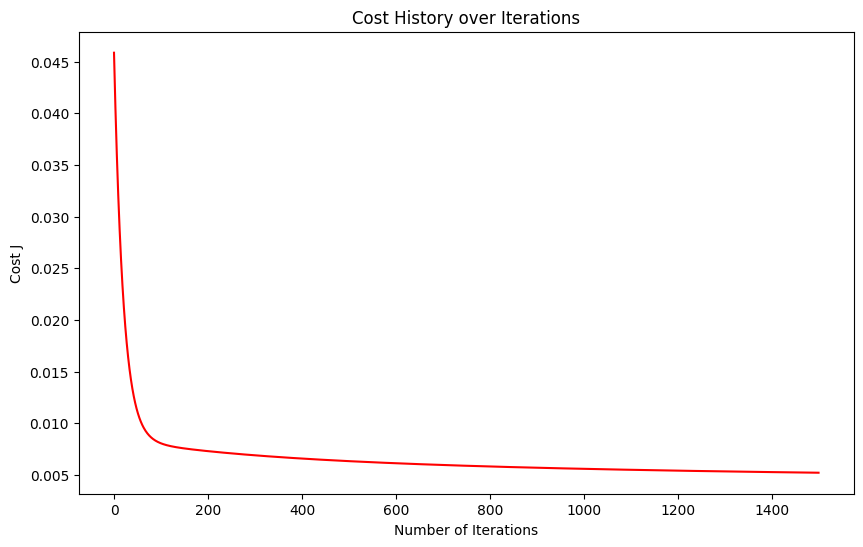

In [14]:
#Display results of normalized training
n = X_norm.shape[1] #number of features
theta_norm = np.zeros(n) #initialize vector of theta values
theta_norm, cost_history = gradient_descent(X_norm, price_norm, theta_norm, alpha, iterations)
print('Final values of theta =', [round(t, 7) for t in theta_norm])
print('cost_history =', round((cost_history[-1]), 7))

# Plotting the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, 'r')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.title('Cost History over Iterations')
plt.show()

Final values of theta = [-0.395041, 0.3123307, 0.0324584, 0.3123298, 0.2190001, 0.1350619, 0.1925578, 0.1718295, 0.2136733, 0.3869454, 0.1353609, 0.2986542]
cost_history = 0.1692743


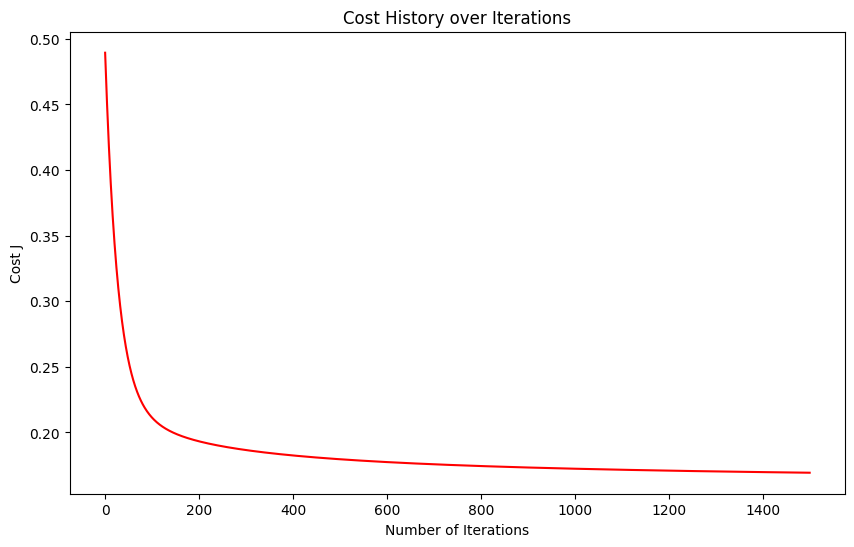

In [15]:
#Display results of standardized training
n = X_std.shape[1] #number of features
theta_std = np.zeros(n) #initialize vector of theta values
theta_std, cost_history = gradient_descent(X_std, price_std, theta_std, alpha, iterations)
print('Final values of theta =', [round(t, 7) for t in theta_std])
print('cost_history =', round((cost_history[-1]), 7))

# Plotting the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, 'r')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.title('Cost History over Iterations')
plt.show()


In [18]:
#Test model
m_t = df_test_norm.shape[0] #Retrieve the number of testing examples
price_t = df_test_norm.values[:, 0]
area_t = df_test_norm.values[:, 1].reshape(m_t,1)
bedrooms_t = df_test_norm.values[:, 2].reshape(m_t,1)
bathrooms_t = df_test_norm.values[:, 3].reshape(m_t,1)
stories_t = df_test_norm.values[:, 4].reshape(m_t,1)
mainroad_t = df_test.values[:, 5].reshape(m_t,1)
guestroom_t = df_test.values[:, 6].reshape(m_t,1)
basement_t = df_test.values[:, 7].reshape(m_t,1)
hotwaterheating_t = df_test.values[:, 8].reshape(m_t,1)
airconditioning_t = df_test.values[:, 9].reshape(m_t,1)
parking_t = df_test_norm.values[:, 10].reshape(m_t,1)
prefarea_t = df_test.values[:, 11].reshape(m_t,1)
X0_t = np.ones((m_t, 1))

X_t = np.hstack((X0_t, area_t, bedrooms_t, bathrooms_t, stories_t,
                 mainroad_t, guestroom_t, basement_t, hotwaterheating_t,
                 airconditioning_t, parking_t, prefarea_t))

Y = X_t.dot(theta_norm)

#Get the minimum and maximum values of the original training price from the scaler
min_price = scaler_norm.data_min_[0]
max_price = scaler_norm.data_max_[0]
Y = Y * (max_price - min_price) + min_price #Manual inverse transform

for y in Y[:10]:
  print(round(y,2))

print(cost_function(X_t, price_t, theta_norm, m_t))

5143.25
7660.58
5792.5
6455.07
6035.76
4779.52
9518.82
5871.32
3996.62
6890.19
0.004607510196477484


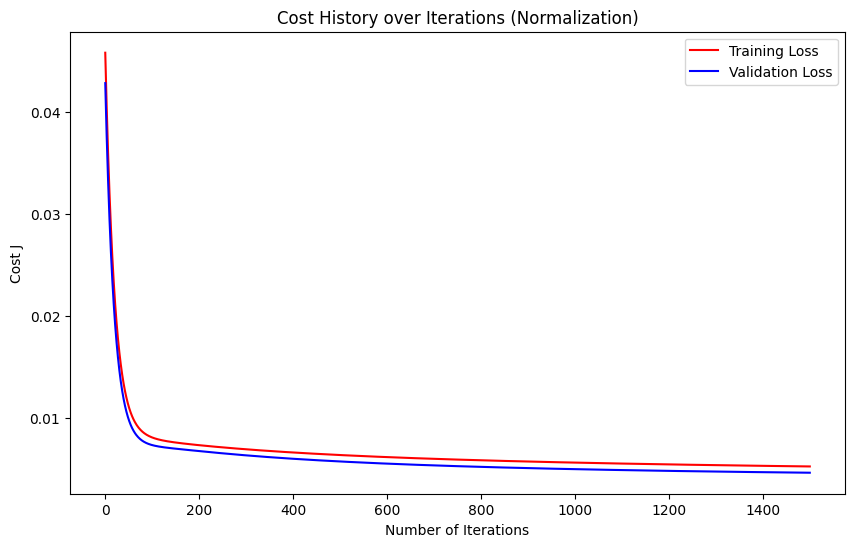

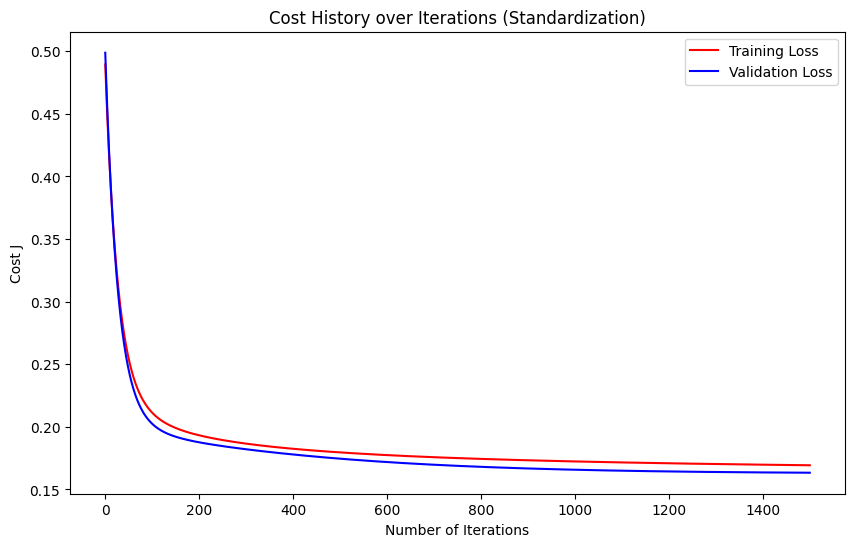

In [20]:
# Calculate training and validation loss for normalized data
m_t_norm = df_test_norm.shape[0]
price_t_norm = df_test_norm.values[:, 0]

# Include all 12 features for the test set, matching the training set features
area_t_norm = df_test_norm.values[:, 1].reshape(m_t_norm,1)
bedrooms_t_norm = df_test_norm.values[:, 2].reshape(m_t_norm,1)
bathrooms_t_norm = df_test_norm.values[:, 3].reshape(m_t_norm,1)
stories_t_norm = df_test_norm.values[:, 4].reshape(m_t_norm,1)
mainroad_t_norm = df_test_norm.values[:, 5].reshape(m_t_norm,1)
guestroom_t_norm = df_test_norm.values[:, 6].reshape(m_t_norm,1)
basement_t_norm = df_test_norm.values[:, 7].reshape(m_t_norm,1)
hotwaterheating_t_norm = df_test_norm.values[:, 8].reshape(m_t_norm,1)
airconditioning_t_norm = df_test_norm.values[:, 9].reshape(m_t_norm,1)
parking_t_norm = df_test_norm.values[:, 10].reshape(m_t_norm,1)
prefarea_t_norm = df_test_norm.values[:, 11].reshape(m_t_norm,1)

X0_t_norm = np.ones((m_t_norm, 1))
X_t_norm = np.hstack((X0_t_norm, area_t_norm, bedrooms_t_norm, bathrooms_t_norm, stories_t_norm,
                      mainroad_t_norm, guestroom_t_norm, basement_t_norm, hotwaterheating_t_norm,
                      airconditioning_t_norm, parking_t_norm, prefarea_t_norm))


# Re-run gradient descent to get theta values and cost history for training and validation
theta_norm_history = []
cost_history_norm_train = []
cost_history_norm_test = []
theta_temp_norm = np.zeros(X_norm.shape[1])
for i in range(iterations):
    h_x_norm = X_norm.dot(theta_temp_norm)
    gradient_norm = X_norm.transpose().dot(np.subtract(h_x_norm, price_norm)) / m
    theta_temp_norm = theta_temp_norm - alpha * gradient_norm
    theta_norm_history.append(theta_temp_norm)
    cost_history_norm_train.append(cost_function(X_norm, price_norm, theta_temp_norm, m))
    cost_history_norm_test.append(cost_function(X_t_norm, price_t_norm, theta_temp_norm, m_t_norm))


# Calculate training and validation loss for standardized data
m_t_std = df_test_std.shape[0]
price_t_std = df_test_std.values[:, 0]

# Include all 12 features for the test set, matching the training set features
area_t_std = df_test_std.values[:, 1].reshape(m_t_std,1)
bedrooms_t_std = df_test_std.values[:, 2].reshape(m_t_std,1)
bathrooms_t_std = df_test_std.values[:, 3].reshape(m_t_std,1)
stories_t_std = df_test_std.values[:, 4].reshape(m_t_std,1)
mainroad_t_std = df_test_std.values[:, 5].reshape(m_t_std,1)
guestroom_t_std = df_test_std.values[:, 6].reshape(m_t_std,1)
basement_t_std = df_test_std.values[:, 7].reshape(m_t_std,1)
hotwaterheating_t_std = df_test_std.values[:, 8].reshape(m_t_std,1)
airconditioning_t_std = df_test_std.values[:, 9].reshape(m_t_std,1)
parking_t_std = df_test_std.values[:, 10].reshape(m_t_std,1)
prefarea_t_std = df_test_std.values[:, 11].reshape(m_t_std,1)

X0_t_std = np.ones((m_t_std, 1))
X_t_std = np.hstack((X0_t_std, area_t_std, bedrooms_t_std, bathrooms_t_std, stories_t_std,
                     mainroad_t_std, guestroom_t_std, basement_t_std, hotwaterheating_t_std,
                     airconditioning_t_std, parking_t_std, prefarea_t_std))

# Re-run gradient descent to get theta values and cost history for training and validation
theta_std_history = []
cost_history_std_train = []
cost_history_std_test = []
theta_temp_std = np.zeros(X_std.shape[1])
for i in range(iterations):
    h_x_std = X_std.dot(theta_temp_std)
    gradient_std = X_std.transpose().dot(np.subtract(h_x_std, price_std)) / m
    theta_temp_std = theta_temp_std - alpha * gradient_std
    theta_std_history.append(theta_temp_std)
    cost_history_std_train.append(cost_function(X_std, price_std, theta_temp_std, m))
    cost_history_std_test.append(cost_function(X_t_std, price_t_std, theta_temp_std, m_t_std))


# Plotting the cost history for Normalization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history_norm_train, 'r', label='Training Loss')
plt.plot(range(iterations), cost_history_norm_test, 'b', label='Validation Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.title('Cost History over Iterations (Normalization)')
plt.legend()
plt.show()

# Plotting the cost history for Standardization
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history_std_train, 'r', label='Training Loss')
plt.plot(range(iterations), cost_history_std_test, 'b', label='Validation Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.title('Cost History over Iterations (Standardization)')
plt.legend()
plt.show()